# Importar Librerias


In [10]:
import pandas as pd
import seaborn as sns

from sklearn.cluster import MiniBatchKMeans # consume menos recursos que k-means

# Cargar DataSet

In [2]:
dataset = pd.read_csv("../data/candy.csv")
dataset

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


# Aprendizaje no supervisado

In [3]:
X = dataset.drop("competitorname", axis=1) # Se borra porque es un string

In [7]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)
print("Total de centros :", len(kmeans.cluster_centers_))
print("="*30)
print("Categoria donde quedo cada dato (85): ", (kmeans.predict(X)))

Total de centros : 4
Categoria donde quedo cada dato (85):  [0 0 1 2 2 2 0 1 1 1 1 1 1 2 1 2 1 2 0 1 2 2 0 0 0 0 1 0 3 2 1 2 3 0 2 0 3
 0 0 2 0 0 3 0 1 1 2 3 1 2 1 3 3 3 3 1 0 1 2 1 0 0 1 2 3 0 0 2 0 1 1 1 1 0
 2 2 2 2 2 3 2 1 2 2 2]


# Unir dataset

In [8]:
dataset["group"] = kmeans.predict(X)

In [9]:
dataset

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,1
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,2
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,2
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,1
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,2
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,2


<Axes: xlabel='sugarpercent', ylabel='winpercent'>

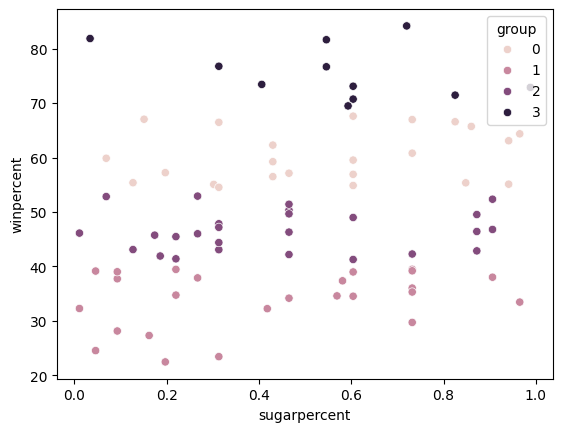

In [13]:
sns.scatterplot(data=dataset, x="sugarpercent",y = "winpercent", hue="group")